In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [5]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets list -s mobile


ref                                                      title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                           8MB  2019-08-26 08:22:16           9658  
ramamet4/app-store-apple-data-set-10k-apps               Mobile App Store ( 7200 apps)                       6MB  2018-06-10 07:04:28          32100  
iabhishekofficial/mobile-price-classification            Mobile Price Classification                        71KB  2018-01-28 08:44:24          13508  
PromptCloudHQ/amazon-reviews-unlocked-mobile-phones      Amazon Reviews: Unlocked Mobile Phones             33MB  2017-01-11 10:22:30           6346  
marcodena/mobile-phone-activity                          Mobile phone activity in a city      

In [8]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification -p /content

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 63.5MB/s]


In [9]:
!unzip \*.zip

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [10]:
#Univariate selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06439703 0.01718814 0.03175363 0.02319936 0.02764644 0.01738763
 0.03902339 0.03546455 0.03708724 0.03185504 0.03402777 0.04759098
 0.04714435 0.38619422 0.03318377 0.03285296 0.0360062  0.01434136
 0.02123789 0.02241805]


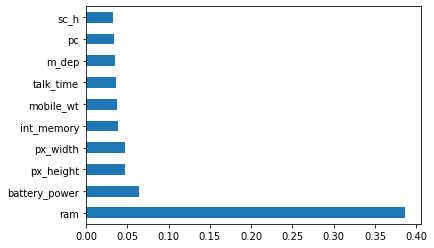

In [11]:
#Feature Importance
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

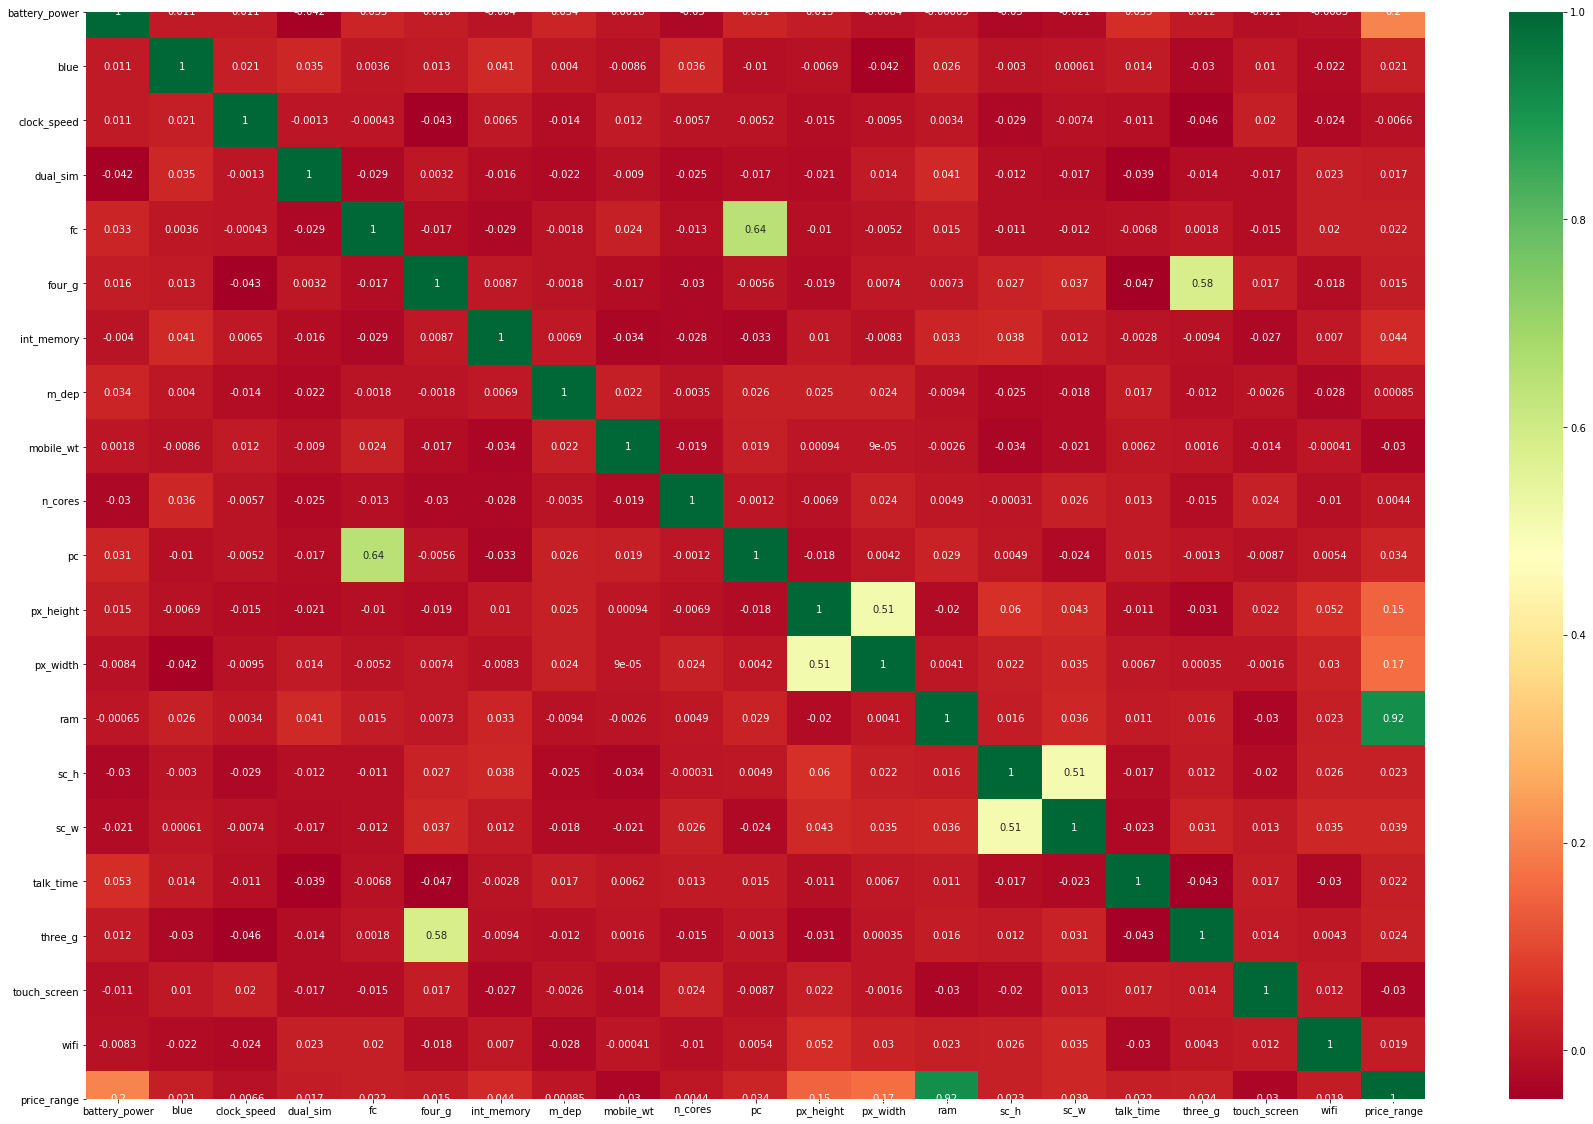

In [13]:
#Correlation matrix with Heatmap
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")